In [30]:
# packages for data analysis
import numpy as np
import pandas as pd

# visual your data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [35]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('C:/Users/Shake/Machine Learning/Linear Regression/1000_Companies.csv')
#Selecting rows and columns
X = companies.iloc[:, :-1].values
y = companies.iloc[:, -1].values

In [37]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
#Identify Non-Numeric Columns
non_numeric_columns = companies.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['State'], dtype='object')


In [ ]:
# Remove Non-Numeric Columns
#companies_numeric = companies.select_dtypes(exclude=['object'])

In [49]:
#Encode Non-Numeric Columns 
companies_encoded = pd.get_dummies(companies, drop_first=True)

In [ ]:
# If you removed non-numeric columns
#sns.heatmap(companies_numeric.corr(), annot=True, cmap='coolwarm')
#plt.show()

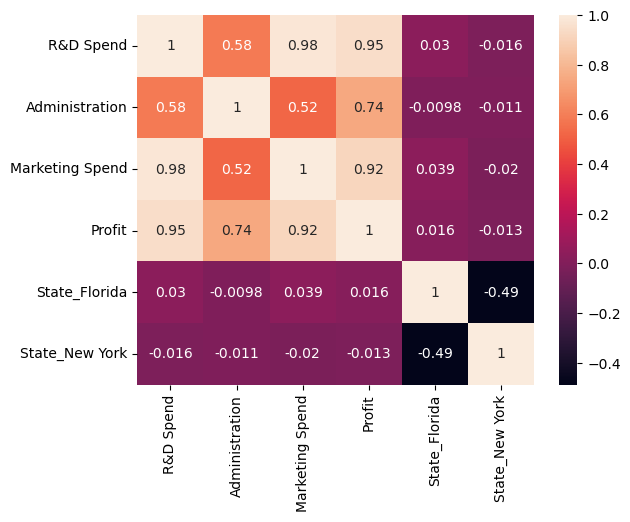

In [50]:
# If you encoded non-numeric columns
sns.heatmap(companies_encoded.corr(), annot=True)

plt.show()

In [39]:
# Encoding categorical data
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), [3])  # One-hot encode the 'State' column and drop the first category to avoid dummy variable trap
    ],
    remainder='passthrough'  # Keep the other columns unchanged
)
X = column_transformer.fit_transform(X)

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [52]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [44]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# Output predictions
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053062,  75316.2814305 ,
       118248.14406603, 164574.40699903, 170937.2898107 , 182069.11645085,
       118845.03252688,  85669.95112228, 180992.59396144,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.07669089,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529206, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924517, 174609.08266881,
        93745.66352058,  

In [46]:

# Calculating the Coefficients
print("Coefficients:", regressor.coef_)

# Calculating the Intercept
print("Intercept:", regressor.intercept_)

# Calculating the R squared value
r2 = r2_score(y_test, y_pred)
print("R squared value:", r2)

Coefficients: [-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
Intercept: -51035.22972403851
R squared value: 0.9112695892268805


In [53]:
#R squared value of 0.91 proves the model is valid and good model